<a href="https://colab.research.google.com/github/aayushi-0407/ML-Projects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###We are going to work with CNN. This is my first CNN model so it covers basic codes useful for begginers

Initially we are importing all the important modules.

In [71]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle as pk
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.datasets import mnist #this library contains a lot of ML datasets including the MNIST one
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt



###Here we load the train and test data from mnist dataset

In [52]:
(train_data,train_labels),(test_data,test_labels)=mnist.load_data() #loading data from mnist dataset

###Checking our images

2


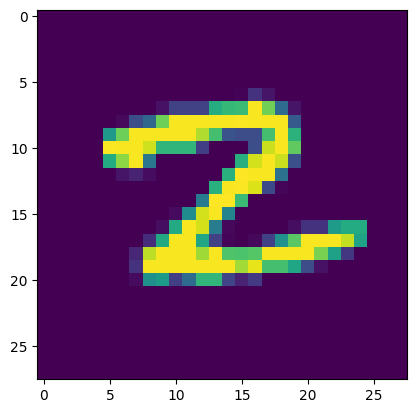

In [53]:
index=143
print(train_labels[index])
plt.imshow(train_data[index])


###Data preprocesing

In [54]:
train_data.shape

(60000, 28, 28)

In [55]:
test_data.shape

(10000, 28, 28)

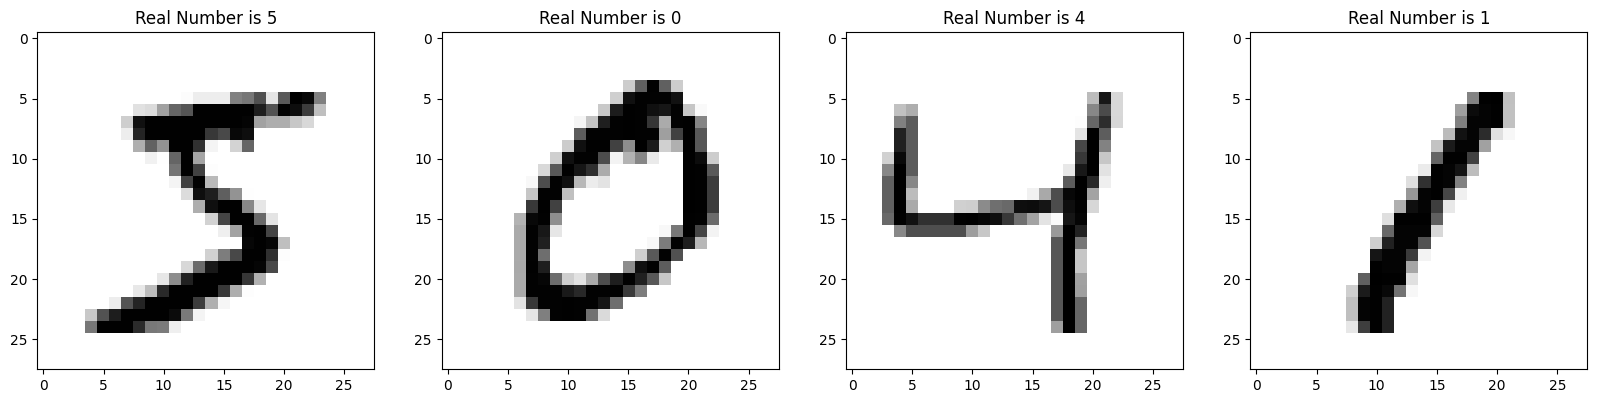

In [56]:
fig,axis=plt.subplots(1,4,figsize=(20,10)) #plotting images
for i,ax in enumerate(axis.flat):
  ax.imshow(train_data[i],cmap='binary')
  ax.set(title=f'Real Number is {train_labels[i]}')


In [57]:
train_data=train_data.reshape(train_data.shape[0],28,28,1) #reshaping the images
test_data=test_data.reshape(test_data.shape[0],28,28,1)

train_data=train_data.astype('float32') #redefining the data types
test_data=test_data.astype('float32')

train_data/=255 #converting images between 0-1
test_data/=255

###CNN Model

In [58]:
input_size=(28,28,1)
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_size)) #converting image to 2D
model.add(MaxPooling2D(pool_size=(2,2)))  #shrinking image
model.add(Flatten())        #converting image to 1D
model.add(Dense(128,activation=tf.nn.relu,use_bias=True))
model.add(Dropout(0.2))
model.add(Dense(70,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [59]:
model.summary() #getting model summary

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 70)                9030      
_________________________________________________________________
dropout_7 (Dropout)          (None, 70)               

In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #compiling our model

###Training CNN Model

In [61]:
history=model.fit(x=train_data, y=train_labels, epochs=10, batch_size=50, validation_split=0.2) #model training

Epoch 1/10
960/960 [==============================] - 29s 29ms/step - loss: 0.3239 - accuracy: 0.9031 - val_loss: 0.1223 - val_accuracy: 0.9642
Epoch 2/10
960/960 [==============================] - 31s 32ms/step - loss: 0.1320 - accuracy: 0.9602 - val_loss: 0.0758 - val_accuracy: 0.9778
Epoch 3/10
960/960 [==============================] - 30s 31ms/step - loss: 0.0942 - accuracy: 0.9711 - val_loss: 0.0675 - val_accuracy: 0.9797
Epoch 4/10
960/960 [==============================] - 28s 30ms/step - loss: 0.0726 - accuracy: 0.9777 - val_loss: 0.0669 - val_accuracy: 0.9808
Epoch 5/10
960/960 [==============================] - 27s 28ms/step - loss: 0.0580 - accuracy: 0.9823 - val_loss: 0.0614 - val_accuracy: 0.9819
Epoch 6/10
960/960 [==============================] - 27s 28ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0635 - val_accuracy: 0.9834
Epoch 7/10
960/960 [==============================] - 29s 31ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0600 - val_accuracy:

###We are plotting training loss , validation loss and
###trainig accuracy and validation accuracy

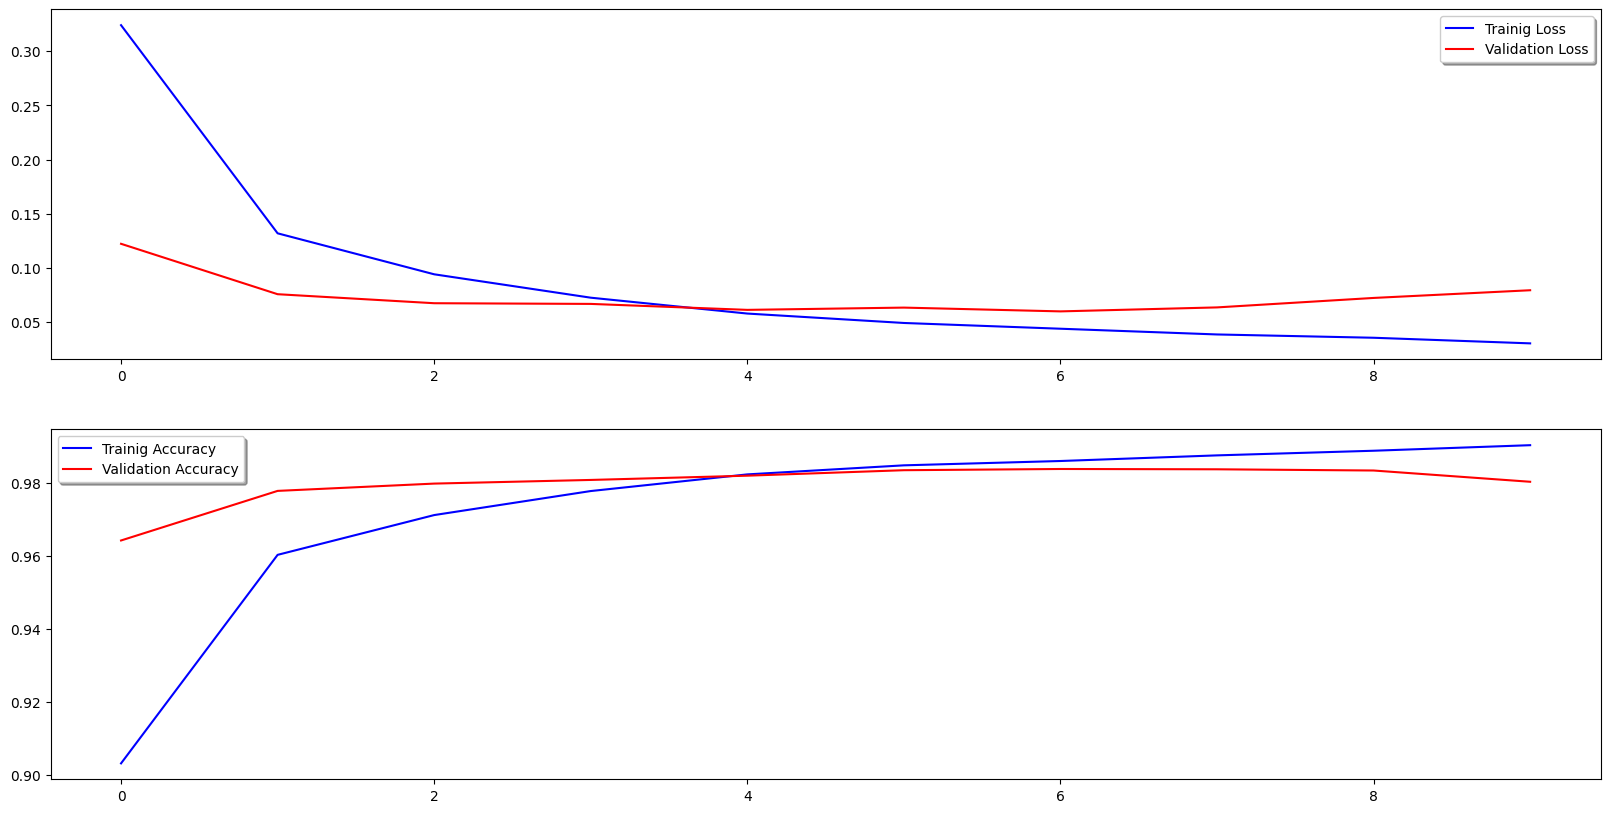

In [69]:
fig,ax=plt.subplots(2,1,figsize=(20,10)) #getting fig and axis from subplots
ax[0].plot(history.history['loss'],color='b',label='Trainig Loss') #plotting training loss
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss',axes=ax[0]) #plotting validation loss
legend=ax[0].legend(loc='best',shadow=True)

ax[1].plot(history.history['accuracy'],color='b',label='Trainig Accuracy') #plotting trainin accuracy
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy',axes=ax[1])#plotting validation accuracy
legend=ax[1].legend(loc='best',shadow=True)

###Model Testing

###First we plot classification report to check precision , recall

In [73]:
ypred=model.predict(test_data) #getting probability
ypred=np.argmax(ypred,1) #getting max
print(classification_report(test_labels,ypred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



###We plot confusion matrix to check the distribution

In [74]:
print(confusion_matrix(test_labels,ypred))

[[ 952    0   16    1    0    0    6    1    4    0]
 [   0 1129    3    2    0    0    1    0    0    0]
 [   0    0 1022    3    0    0    1    5    1    0]
 [   0    0    2 1000    0    1    0    4    1    2]
 [   0    1    7    0  964    0    2    1    0    7]
 [   1    0    1   14    0  864    8    0    2    2]
 [   2    2    1    1    1    2  948    0    1    0]
 [   1    1    6    4    0    0    0 1009    1    6]
 [   2    0    5    4    2    2    1    5  952    1]
 [   1    3    3   12    8    2    1    5    3  971]]


###We find our model is 98% accurate